C:\Users\karti\AppData\Local\Temp\ipykernel_29032\4443474.py:11: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


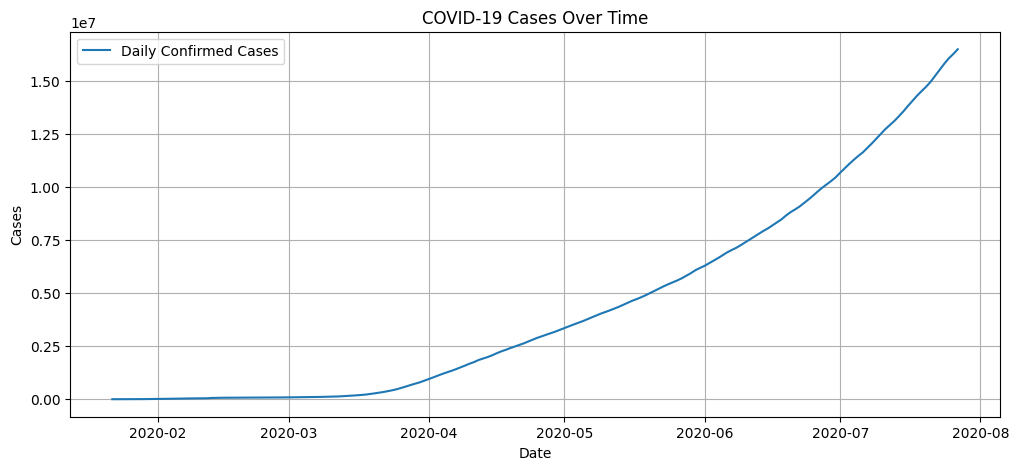

ADF Statistic: 2.0564702385879507
p-value: 0.9987419829144141
Critical Values:
	1%: -3.4680615871598537
	5%: -2.8781061899535128
	10%: -2.5756015922004134

❌ The time series is *non-stationary* (p-value > 0.05)


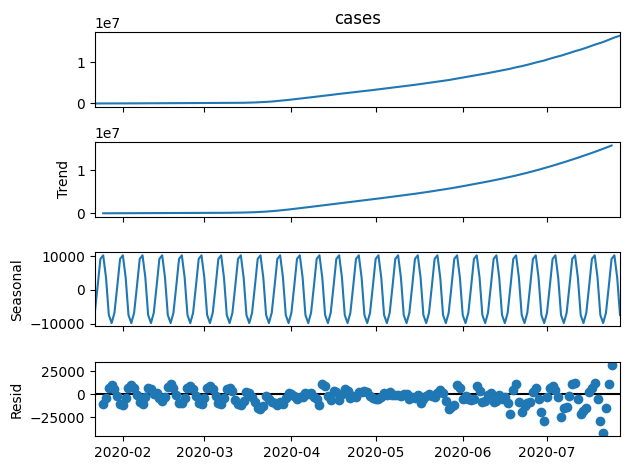

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset (example: 'covid_19_india.csv')
df = pd.read_csv("covid_19_clean_complete.csv")

# Parse date and sort
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.groupby('Date')[['Confirmed']].sum().sort_index()

# Rename for clarity
df.columns = ['cases']

# Plot raw time series
plt.figure(figsize=(12, 5))
plt.plot(df['cases'], label='Daily Confirmed Cases')
plt.title("COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 📉 ADF Test for Stationarity
# -------------------------------
result = adfuller(df['cases'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

if result[1] > 0.05:
    print("\n❌ The time series is *non-stationary* (p-value > 0.05)")
else:
    print("\n✅ The time series is *stationary* (p-value <= 0.05)")

# -------------------------------
# 📊 Decomposition: Trend + Seasonality
# -------------------------------
decompose_result = seasonal_decompose(df['cases'], model='additive', period=7)

decompose_result.plot()
plt.tight_layout()
plt.show()
